In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import os
import numpy as np

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import  shuffle
import tensorflow as tf

In [4]:
x_training = []
y_training = []
image_size = 190
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels :
    folderPath = os.path.join('/kaggle/input/brain-tumor/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x_training.append(img) 
        y_training.append(i) 
        
        
for i in labels :
    folderPath = os.path.join('/kaggle/input/brain-tumor/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x_training.append(img) 
        y_training.append(i) 
        
        
x_training = np.array(x_training)
y_training = np.array(y_training)

In [5]:
x_training,y_training = shuffle(x_training,y_training,random_state=100)
x_training.shape

(3264, 190, 190, 3)

In [6]:
x_training,x_test,y_training,y_test = train_test_split(x_training,y_training,test_size=0.1,random_state=100)

In [7]:
y_train_new = []
for i in y_training:
    if isinstance(i, np.ndarray) and i.dtype.kind in 'biufc':  # Check if it's a numeric array
        # Assuming label is indicated by the index of the maximum value
        label_index = np.argmax(i)
        label_string = labels[label_index]
    else:
        label_string = i  # Assume it's already the label string
    y_train_new.append(labels.index(label_string))

y_training = y_train_new
y_training = tf.keras.utils.to_categorical(y_training)

# ... (rest of your code for y_test remains the same)

# ... (your code for y_train_new remains the same)

y_test_new = []
for i in y_test:
    if isinstance(i, np.ndarray) and i.dtype.kind in 'biufc':  # Check if it's a numeric array
        # Assuming label is indicated by the index of the maximum value
        label_index = np.argmax(i)
        label_string = labels[label_index]
    else:
        label_string = i  # Assume it's already the label string
    y_test_new.append(labels.index(label_string))

y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(190,190,3)))
model.add(Conv2D(64,(3,3),activation = 'relu')) 

#model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(190,190,3)))
#model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu')) 
model.add(Conv2D(64,(3,3),activation = 'relu')) 
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu')) 
model.add(Conv2D(128,(3,3),activation = 'relu')) 
model.add(Conv2D(128,(3,3),activation = 'relu')) 
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu')) 
model.add(Conv2D(256,(3,3),activation = 'relu')) 
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 188, 188, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 186, 186, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 93, 93, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 93, 93, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 91, 91, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 89, 89, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 44, 44, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 44, 44, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 42, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,592,772 (28.96 MB)

 Trainable params: 7,592,772 (28.96 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
from tensorflow.keras.models import load_model
import pickle

model_path = "/kaggle/working/my_model.h5"
history_path = "/kaggle/working/history.pkl"
history = model.fit(x_training,y_training,epochs=1,validation_split=0.1)
model.save(model_path)
with open(history_path, 'wb') as f:
    pickle.dump(history, f)


83/83 ━━━━━━━━━━━━━━━━━━━━ 450s 5s/step - accuracy: 0.3030 - loss: 1.3525 - val_accuracy: 0.3878 - val_loss: 1.3824


In [15]:
from tensorflow.keras.models import load_model
import pickle

model_path = "/kaggle/working/my_model.h5"
history_path = "/kaggle/working/history.pkl"

# Check if model and history exist
if os.path.exists(model_path) and os.path.exists(history_path):
    model = load_model(model_path)  # Load the model
    with open('history.pkl', 'rb') as f:
        history = pickle.load(f)
        
else:
    # Run training if no saved files are found

    history = model.fit(x_training,y_training,epochs=1,validation_split=0.1)
    model.save(model_path)
    with open('history.pkl', 'wb') as f:
        pickle.dump(history, f)
    

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

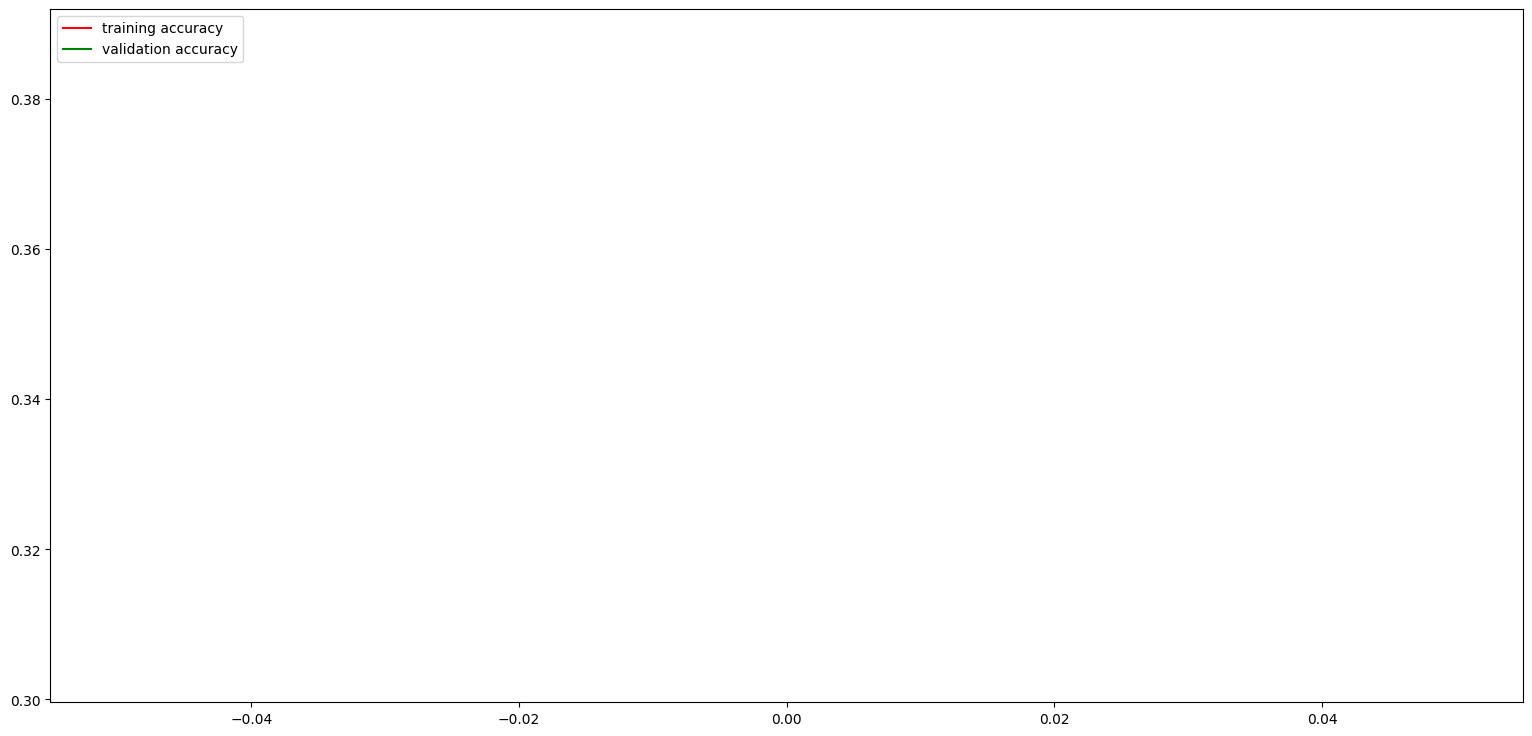

In [18]:
#model.save('T19')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(19,9))
plt.plot(epochs,acc,'r',label='training accuracy')
plt.plot(epochs,val_acc,'g',label='validation accuracy')
plt.legend(loc='upper left')
plt.show()

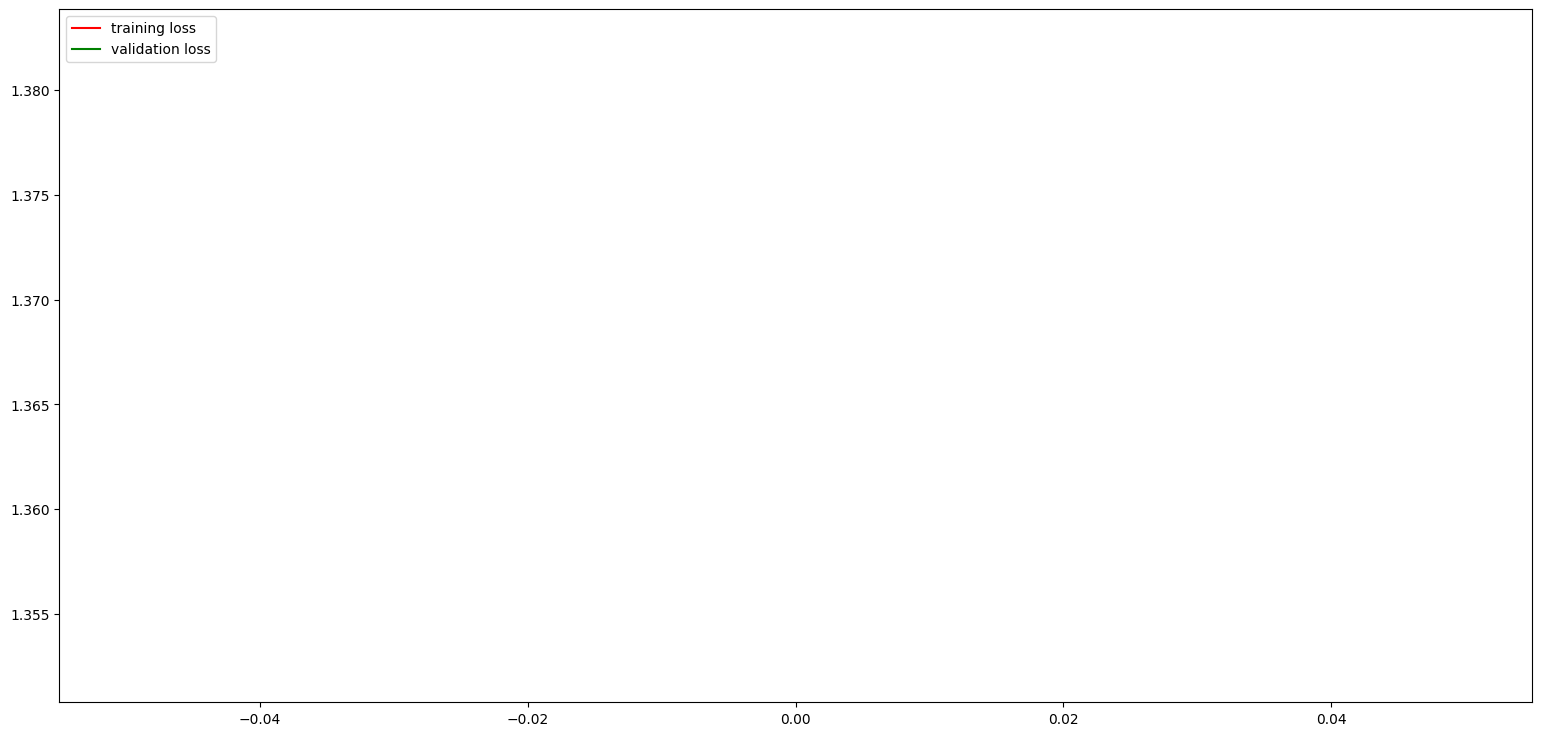

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(19,9))
plt.plot(epochs,loss,'r',label='training loss')
plt.plot(epochs,val_loss,'g',label='validation loss')
plt.legend(loc='upper left')
plt.show()

In [20]:
img = cv2.imread('/kaggle/input/brain-tumor/Testing/glioma_tumor/image(10).jpg')
img = cv2.resize(img,(190,190))
img_array = np.array(img)
img_array.shape

(190, 190, 3)

In [21]:
img_array = img_array.reshape(1,190,190,3)
img_array.shape

(1, 190, 190, 3)

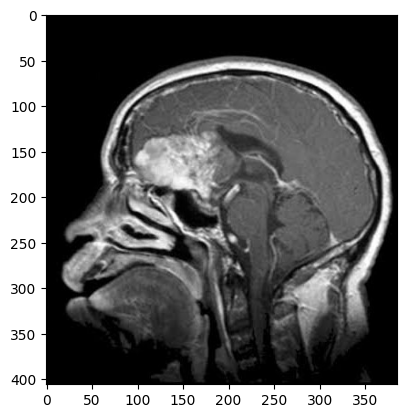

In [22]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor/Testing/glioma_tumor/image(10).jpg')
plt.imshow(img)
plt.show()

In [23]:
finalllll = model.predict(img_array)
indices = finalllll.argmax()

# Get the predicted tumor type from the 'labels' list
predicted_tumor_type = labels[indices]


print(f"The model predicts that the image shows a {predicted_tumor_type}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
The model predicts that the image shows a pituitary_tumor.


In [24]:
#done

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
path = os.listdir('/kaggle/input/brain-tumor/Training')
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'meningioma_tumor': 1, 'glioma_tumor': 1}

In [30]:
import cv2
X, Y = [], []
for cls in classes:
    # Correct the path to directly access the class folders inside /content/Training
    pth = os.path.join('//kaggle/input/brain-tumor/Training', cls)  # Use os.path.join for platform compatibility 
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)  # Use os.path.join here as well
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [31]:
np.unique(Y)

array([0, 1])

In [32]:
X = np.array(X)
y = np.array(Y)
pd.Series(Y).value_counts()

1    2475
0     395
Name: count, dtype: int64

In [33]:
X.shape

(2870, 200, 200)

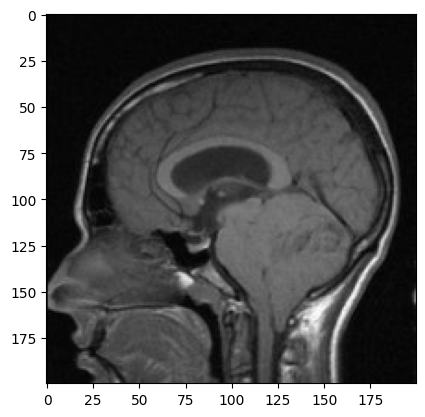

In [34]:
plt.imshow(X[0], cmap='gray')


In [35]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [37]:
xtrain.shape, xtest.shape


((2296, 40000), (574, 40000))

In [38]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [39]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

In [40]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca_train, ytrain)


KNeighborsClassifier()

In [42]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [43]:
print("Training Score: ", knn.score(pca_train, ytrain))
print("testing Score: ", knn.score(pca_test, ytest))
print("Training Score: ", sv.score(pca_train, ytrain))
print("testing Score: ", sv.score(pca_test, ytest))

Training Score:  0.943815331010453
testing Score:  0.9303135888501742
Training Score:  0.9899825783972126
testing Score:  0.9320557491289199


In [44]:
from sklearn.metrics import accuracy_score

# Predictions for KNN
knn_predictions = knn.predict(pca_test) 
knn_accuracy = accuracy_score(ytest, knn_predictions)

# Predictions for SVC
sv_predictions = sv.predict(pca_test)
sv_accuracy = accuracy_score(ytest, sv_predictions)

print("KNN Accuracy:", knn_accuracy)
print("SVC Accuracy:", sv_accuracy)

KNN Accuracy: 0.9303135888501742
SVC Accuracy: 0.9320557491289199


Enter the path to the image:  /kaggle/input/brain-tumor/Testing/pituitary_tumor/image(13).jpg


KNN Prediction: 0
SVC Prediction: 0

Prediction Explanation:
0 means the image is predicted to have no tumor (no_tumor).
1 means the image is predicted to have a tumor (pituitary_tumor, meningioma_tumor, or glioma_tumor).


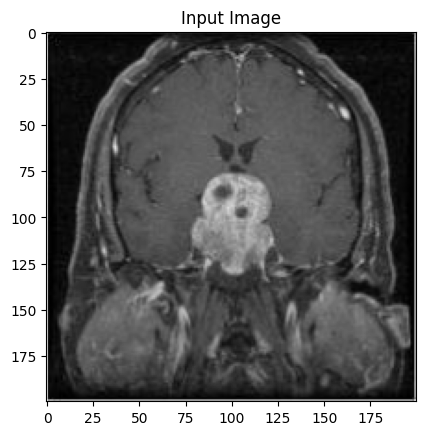

In [45]:
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'knn', 'sv', and 'pca' are already defined and trained

def predict_image(image_path):
    """Predicts the class of an image using the trained KNN and SVC models.

    Args:
        image_path: The path to the image file.

    Returns:
        A tuple containing the KNN prediction, SVC prediction, and the processed image.
    """
    img = cv2.imread(image_path, 0)  # Load image in grayscale
    img = cv2.resize(img, (200, 200))  # Resize to match training data
    img_flat = img.reshape(1, -1)  # Flatten the image
    img_flat = img_flat / 255  # Normalize pixel values
    img_pca = pca.transform(img_flat)  # Apply PCA transformation

    knn_prediction = knn.predict(img_pca)[0]  # Get KNN prediction
    sv_prediction = sv.predict(img_pca)[0]  # Get SVC prediction

    return knn_prediction, sv_prediction, img

# Get the image path from the user
image_path = input("Enter the path to the image: ")

# Predict the class of the image
knn_prediction, sv_prediction, img = predict_image(image_path)

# Print the predictions with explanations
print("KNN Prediction:", knn_prediction)
print("SVC Prediction:", sv_prediction)

# Add explanations for 0 and 1
print("\nPrediction Explanation:")
print("0 means the image is predicted to have no tumor (no_tumor).")
print("1 means the image is predicted to have a tumor (pituitary_tumor, meningioma_tumor, or glioma_tumor).") 

# Display the image (optional)
plt.imshow(img, cmap='gray')
plt.title("Input Image")
plt.show()